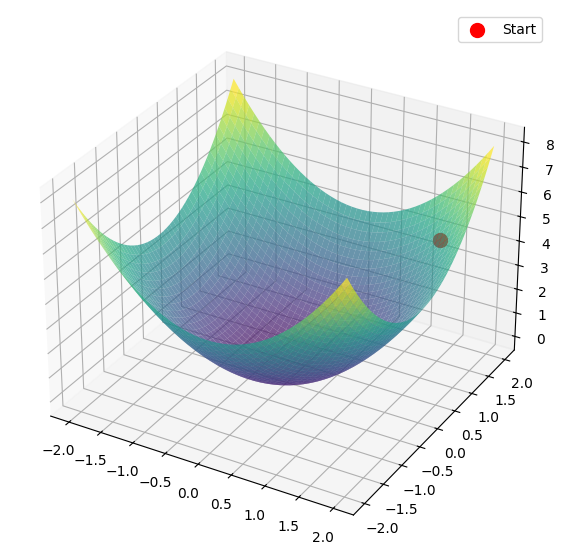

C:\Program Files\Python311\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Define the function and its gradient
def f(x, y):
    return x**2 + y**2

def gradient(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# Gradient Descent Parameters
learning_rate = 0.1
iterations = 30
initial_point = np.array([1.5, 1.5])

# Perform gradient descent
points = [initial_point]
x, y = initial_point
for _ in range(iterations):
    grad = gradient(x, y)
    x, y = x - learning_rate * grad[0], y - learning_rate * grad[1]
    points.append([x, y])
points = np.array(points)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Generate surface plot
grid_x = np.linspace(-2, 2, 50)
grid_y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(grid_x, grid_y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot initial point
ax.scatter(points[0, 0], points[0, 1], f(points[0, 0], points[0, 1]), color='red', s=100, label='Start')

# Animation function
def update(num):
    ax.scatter(points[num, 0], points[num, 1], f(points[num, 0], points[num, 1]), color='blue', s=50)

def animate():
    ani = animation.FuncAnimation(fig, update, frames=len(points), interval=300)
    plt.legend()
    plt.show()

animate()
